## 4. アルゴリズムの評価　入力項目の重要度


In [ ]:
# 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1

In [ ]:
# 共通事前処理

# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# 必要ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib日本語化対応
import japanize_matplotlib

# データフレーム表示用関数
from IPython.display import display

# 表示オプション調整
# numpyの浮動小数点の表示精度
np.set_printoptions(suppress=True, precision=4)
# pandasでの浮動小数点の表示精度
pd.options.display.float_format = '{:.4f}'.format
# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)
# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14
# 乱数の種
random_seed = 123

### アイリスデータセットで入力項目の重要度を確認

#### アイリスデータセットのデータ前処理

In [ ]:
# ランダムフォレストのモデルを作るまで
# サンプルデータの読み込み
import seaborn as sns
df_iris = sns.load_dataset("iris")
columns_i = ['がく片長', 'がく片幅', '花弁長', '花弁幅', '種別']
df_iris.columns = columns_i
# 入力データ x
x = df_iris[['がく片長', 'がく片幅', '花弁長', '花弁幅']]
# 正解データ y
y = df_iris['種別']

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

#### ランダムフォレストでの学習と入力項目の重要度を確認
※学習データトテストデータ分割していませんので注意

花弁長    0.4611
花弁幅    0.4257
がく片長   0.0874
がく片幅   0.0257
dtype: float64


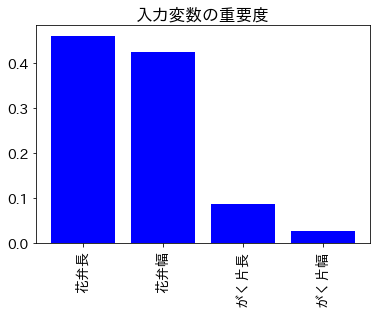

In [ ]:
# アルゴリズムの選定(ランダムフォレスト)
from sklearn.ensemble import RandomForestClassifier
algorithm = RandomForestClassifier(random_state=random_seed)
# 学習
algorithm.fit(x, y)
# 重要度ベクトルの取得
importances = algorithm.feature_importances_
# 項目名をキーにSeriesを生成
w = pd.Series(importances, index=x.columns)
# 値の大きい順にソート
u = w.sort_values(ascending=False)
# 結果確認
print(u)
# 重要度の棒グラフ表示
# 棒グラフ表示
plt.bar(range(len(u)), u, color='b', align='center')
# 項目名表示(90度回転)
plt.xticks(range(len(u)), u.index, rotation=90)
# タイトル表示
plt.title('入力変数の重要度')
plt.show()

#### 決定木での学習と入力項目の重要度を確認
※学習データトテストデータ分割していませんので注意

花弁長    0.5507
花弁幅    0.4226
がく片長   0.0267
がく片幅   0.0000
dtype: float64


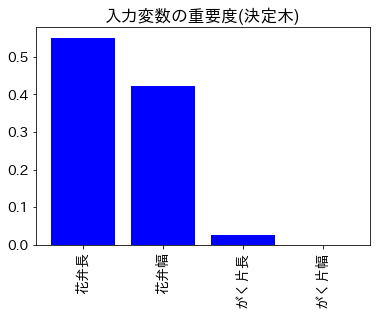

In [ ]:
# 決定木の場合
from sklearn.tree import DecisionTreeClassifier
algorithm = DecisionTreeClassifier(random_state=random_seed)
# 学習
algorithm.fit(x, y)
# 重要度ベクトルの取得
importances = algorithm.feature_importances_
w = pd.Series(importances, index=x.columns)
# 値の大きい順にソート
u = w.sort_values(ascending=False)
# 結果確認
print(u)
# 重要度の棒グラフ表示
# 棒グラフ表示
plt.bar(range(len(u)), u, color='b', align='center')
# 項目名表示(90度回転)
plt.xticks(range(len(u)), u.index, rotation=90)
# タイトル表示
plt.title('入力変数の重要度(決定木)')
plt.show()

#### XGBoostでの学習と入力項目の重要度を確認
※学習データトテストデータ分割していませんので注意

花弁長    0.5958
花弁幅    0.3582
がく片幅   0.0335
がく片長   0.0125
dtype: float32


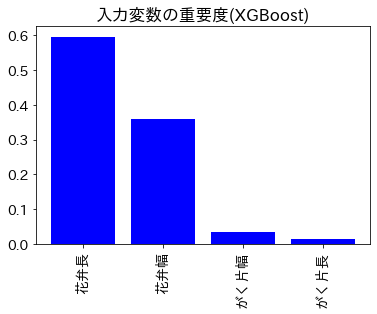

In [ ]:
# XGBoostの場合
import xgboost
algorithm = xgboost.XGBClassifier(random_state=random_seed)
algorithm.fit(x, y)
# 重要度ベクトルの取得
importances = algorithm.feature_importances_
w = pd.Series(importances, index=x.columns)
u = w.sort_values(ascending=False)
# 結果確認
print(u)
# 重要度の棒グラフ表示
# 棒グラフ表示
plt.bar(range(len(u)), u, color='b', align='center')
# 項目名表示(90度回転)
plt.xticks(range(len(u)), u.index, rotation=90)
# タイトル表示
plt.title('入力変数の重要度(XGBoost)')
plt.show()

### おまけ Breast Cncerデータセットで入力項目の重要度を確認


#### Breast Cancerセットのデータ前処理

In [1]:
# 混同行列表示用関数
def make_cm(matrix, columns):
    # matrix numpy配列
    
    # columns 項目名リスト
    n = len(columns)
    
    # '正解データ'をn回繰り返すリスト生成
    act = ['正解データ'] * n
    pred = ['予測結果'] * n
    
    #データフレーム生成
    cm = pd.DataFrame(matrix, 
        columns=[pred, columns], index=[act, columns])
    return cm

In [ ]:
# データのロード()
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

# データフレームへの取り込み
columns = [
    '半径_平均', 'きめ_平均', '周長_平均', '面積_平均', 
    '平滑度_平均','コンパクト度_平均', '凹面_平均',
    '凹点_平均', '対称性_平均', 'フラクタル度_平均',
    '半径_標準誤差', 'きめ_標準誤差', '周長_標準誤差',
    '面積_標準誤差', '平滑度_標準誤差',
    'コンパクト度_標準誤差', '凹面_標準誤差', '凹点_標準誤差',
    '対称性_標準誤差', 'フラクタル度_標準誤差',
    '半径_最大', 'きめ_最大', '周長_最大', '面積_最大', 
    '平滑度_最大','コンパクト度_最大', '凹面_最大', '凹点_最大', 
    '対称性_最大', 'フラクタル度_最大'
]

df = pd.DataFrame(cancer.data, columns=columns)

# 正解データ y
# 良性: 0 悪性: 1に値を変更する
y = pd.Series(1- cancer.target)
# 入力データ x
x = df

# (4) データ分割
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
    train_size=0.7, test_size=0.3, random_state=random_seed)

#### ランダムフォレストでの学習と入力項目の重要度を確認

score: 0.9825


予測結果    
           良性  悪性
正解データ 良性  102   1
      悪性    2  66

面積_最大         0.1448
半径_最大         0.1289
周長_最大         0.1125
凹点_最大         0.1051
凹点_平均         0.0977
周長_平均         0.0503
面積_平均         0.0445
面積_標準誤差       0.0428
半径_平均         0.0417
凹面_平均         0.0364
凹面_最大         0.0270
きめ_最大         0.0258
きめ_平均         0.0176
コンパクト度_最大     0.0149
平滑度_最大        0.0139
周長_標準誤差       0.0127
対称性_最大        0.0107
半径_標準誤差       0.0092
コンパクト度_平均     0.0087
フラクタル度_標準誤差   0.0081
平滑度_平均        0.0075
フラクタル度_最大     0.0057
対称性_標準誤差      0.0054
凹面_標準誤差       0.0053
コンパクト度_標準誤差   0.0049
きめ_標準誤差       0.0042
フラクタル度_平均     0.0041
平滑度_標準誤差      0.0040
凹点_標準誤差       0.0039
対称性_平均        0.0017
dtype: float64


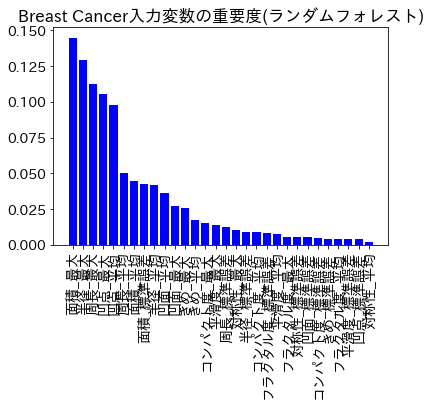

In [ ]:
# アルゴリズムの選定(ランダムフォレスト)
from sklearn.ensemble import RandomForestClassifier
algorithm = RandomForestClassifier(random_state=random_seed)
# 学習
algorithm.fit(x_train, y_train)
# 予測
y_pred = algorithm.predict(x_test)
# 評価
score = algorithm.score(x_test, y_test)
# 結果確認
print(f'score: {score:.4f}')
# 必要ライブラリの取込み
from sklearn.metrics import confusion_matrix
# 混同行列の生成
#   y_test: 検証データの正解データ
#   y_pred: 検証データの予測結果
matrix = confusion_matrix(y_test, y_pred)

# make_cmを使った混同行列標示
cm = make_cm(matrix, ['良性', '悪性'])
display(cm)

# 重要度ベクトルの取得
importances = algorithm.feature_importances_

w = pd.Series(importances, index=x.columns)
u = w.sort_values(ascending=False)
# 結果確認
print(u)

plt.bar(range(len(u)), u, color='b', align='center')
plt.xticks(range(len(u)), u.index, rotation=90)

plt.title('Breast Cancer入力変数の重要度(ランダムフォレスト)')
plt.show()

#### XGBoostでの学習と入力項目の重要度を確認
※学習データトテストデータ分割していませんので注意

score: 0.9766


予測結果    
           良性  悪性
正解データ 良性  101   2
      悪性    2  66

半径_最大         0.5225
凹点_平均         0.1261
周長_最大         0.1014
凹点_最大         0.0485
周長_平均         0.0285
面積_最大         0.0215
きめ_最大         0.0210
半径_平均         0.0174
凹面_最大         0.0131
面積_平均         0.0121
平滑度_標準誤差      0.0103
面積_標準誤差       0.0097
きめ_平均         0.0083
平滑度_最大        0.0069
フラクタル度_平均     0.0063
凹面_標準誤差       0.0059
コンパクト度_最大     0.0054
コンパクト度_平均     0.0051
対称性_標準誤差      0.0046
コンパクト度_標準誤差   0.0042
半径_標準誤差       0.0035
フラクタル度_標準誤差   0.0034
対称性_平均        0.0032
平滑度_平均        0.0025
周長_標準誤差       0.0023
フラクタル度_最大     0.0022
凹点_標準誤差       0.0015
対称性_最大        0.0014
きめ_標準誤差       0.0011
凹面_平均         0.0000
dtype: float32


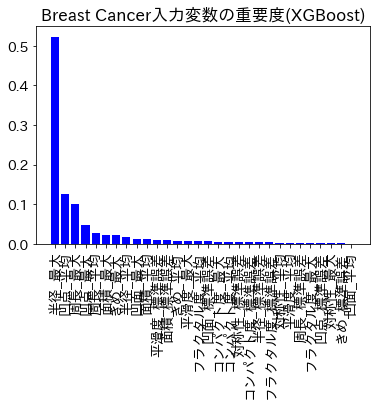

In [ ]:
# XGBoostの場合
import xgboost
algorithm = xgboost.XGBClassifier(random_state=random_seed)
# 学習
algorithm.fit(x_train, y_train)
# 予測
y_pred = algorithm.predict(x_test)
# 評価
score = algorithm.score(x_test, y_test)
# 結果確認
print(f'score: {score:.4f}')
# 必要ライブラリの取込み
from sklearn.metrics import confusion_matrix
# 混同行列の生成
#   y_test: 検証データの正解データ
#   y_pred: 検証データの予測結果
matrix = confusion_matrix(y_test, y_pred)

# make_cmを使った混同行列標示
cm = make_cm(matrix, ['良性', '悪性'])
display(cm)

# 重要度ベクトルの取得
importances = algorithm.feature_importances_

w = pd.Series(importances, index=x.columns)
u = w.sort_values(ascending=False)
# 結果確認
print(u)

plt.bar(range(len(u)), u, color='b', align='center')
plt.xticks(range(len(u)), u.index, rotation=90)

plt.title('Breast Cancer入力変数の重要度(XGBoost)')
plt.show()

## 5. アルゴリズムの評価 回帰モデルの評価方法

回帰：特定の値を予測するためのモデルを指す。

#### ボストンデータセットを使って回帰モデルの評価方法を確認します。

ボストンデータセット：ボストンの住宅価格を以下の項目\
CRIM： 町別の「犯罪率」\
ZN： 25,000平方フィートを超える区画に分類される住宅地の割合＝「広い家の割合」\
INDUS： 町別の「非小売業の割合」\
CHAS： 区画が川に接している場合は1、そうでない場合は0＝「川の隣か」
NOX： 「NOx濃度（0.1ppm単位）」＝一酸化窒素濃度（parts per 10 million単位）。この項目を目的変数とする場合もある\
RM： 1戸当たりの「平均部屋数」\
AGE： 1940年より前に建てられた持ち家の割合＝「古い家の割合」\
DIS： 5つあるボストン雇用センターまでの加重距離＝「主要施設への距離」\
RAD： 「主要高速道路へのアクセス性」の指数\
TAX： 10,000ドル当たりの「固定資産税率」\
PTRATIO： 町別の「生徒と先生の比率」\
B： 「1000(Bk - 0.63)」の二乗値。Bk＝「町ごとの黒人の割合」を指す\
LSTAT： 「低所得者人口の割合」\
MEDV：「住宅価格」（1000ドル単位）の中央値。通常はこの数値が目的変数として使われる\



### 確認内容として

RM： 1戸当たりの「平均部屋数」だけを使って住宅価格を予測すると
すべての項目を使って住宅価格予測を行った場合の結果を決定係数を使って
グラフ上で評価できるようにする

In [ ]:
# データ読み込みからデータ分割まで

# データ読み込み(ボストン・データセット)
from sklearn.datasets import load_boston
boston = load_boston()

# df: 入力データ
df = pd.DataFrame(boston.data, columns=boston.feature_names)

# y: 正解データ
y = boston.target

# 1項目だけの入力データ df1を作る
df1 = df[['RM']]

# 結果確認
display(df.head())
display(df1.head())
print(y[:5])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0063,18.0000,2.3100,0.0000,0.5380,6.5750,65.2000,4.0900,1.0000,296.0000,15.3000,396.9000,4.9800
1,0.0273,0.0000,7.0700,0.0000,0.4690,6.4210,78.9000,4.9671,2.0000,242.0000,17.8000,396.9000,9.1400
2,0.0273,0.0000,7.0700,0.0000,0.4690,7.1850,61.1000,4.9671,2.0000,242.0000,17.8000,392.8300,4.0300
3,0.0324,0.0000,2.1800,0.0000,0.4580,6.9980,45.8000,6.0622,3.0000,222.0000,18.7000,394.6300,2.9400
4,0.0691,0.0000,2.1800,0.0000,0.4580,7.1470,54.2000,6.0622,3.0000,222.0000,18.7000,396.9000,5.3300


,RM
0,6.5750
1,6.4210
2,7.1850
3,6.9980
4,7.1470


[24.  21.6 34.7 33.4 36.2]


 ### アルゴリズム: XGBRegressor
 XGBoostの回帰版です。


データ項目を1項目にしてXGBRegressorモデルで学習する処理

In [ ]:
# アルゴリズム選定から予測まで

# 入力項目を1項目使った場合の回帰予測
# アルゴリズム: XGBRegressor
from xgboost import XGBRegressor
algorithm1 = XGBRegressor(objective ='reg:squarederror',
    random_state=random_seed)

# 学習 (入力データにdf1を利用)
algorithm1.fit(df1, y)

# 予測
y_pred1 = algorithm1.predict(df1)

print(f'y_pred1[:5] {y_pred1[:5]}')

すべてのデータ項目でXGBRegressorモデルで学習する処理

In [ ]:
# 入力項目をすべて使った場合の回帰予測
# アルゴリズム: XGBRegressor
from xgboost import XGBRegressor
algorithm2 = XGBRegressor(objective ='reg:squarederror',
    random_state=random_seed)

# 学習 (入力データにdfを利用)
algorithm2.fit(df, y)

# 予測
y_pred2 = algorithm2.predict(df)

In [ ]:
# 結果確認
print(f'y[:5] {y[:5]}')
print(f'y_pred2[:5] {y_pred2[:5]}')

y[:5] [24.  21.6 34.7 33.4 36.2]
y_pred1[:5] [25.438  20.3028 33.6333 31.4608 33.9829]
y_pred2[:5] [26.6479 22.2483 34.0721 34.315  35.4908]


グラフ表示のための正解データのレンジを生成する

In [ ]:
#　正解データ yの最大値と最小値の計算
y_range = np.array([y.min(), y.max()])

# 結果確認
print(y_range)

[ 5. 50.]


#### 散布図表示

#### データ項目が1項目の入力変数の場合　正解データをX軸、予測結果をY軸とした散布図を表示する

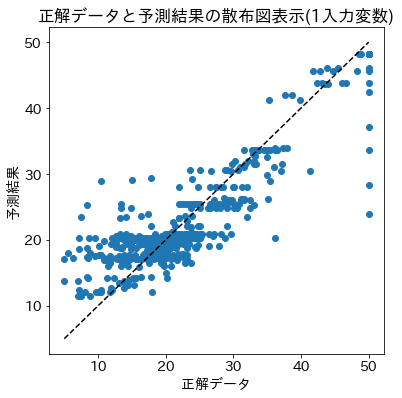

In [ ]:
# 散布図による結果確認(1入力変数)

# 描画サイズ指定
plt.figure(figsize=(6,6))

# 散布図
plt.scatter(y, y_pred1)

# 正解データをX軸とY軸に設定した直線を描画
plt.plot(y_range, y_range, 'k--')

# ラベル・タイトル
plt.xlabel('正解データ')
plt.ylabel('予測結果')
plt.title('正解データと予測結果の散布図表示(1入力変数)')

plt.show()

#### データ項目が13項目の入力変数の場合　正解データをX軸、予測結果をY軸とした散布図を表示する

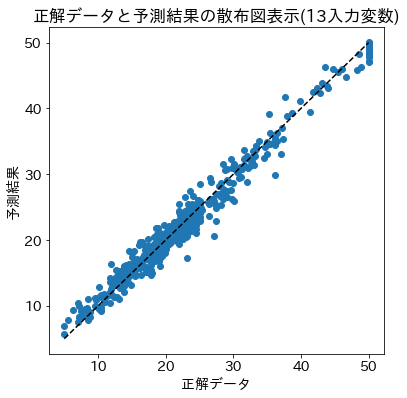

In [ ]:
# 散布図による結果確認(13入力変数)

# 描画サイズ指定
plt.figure(figsize=(6,6))

# 散布図
plt.scatter(y, y_pred2)

# 正解データをX軸とY軸に設定した直線を描画
plt.plot(y_range, y_range, 'k--')

# ラベル・タイトル
plt.xlabel('正解データ')
plt.ylabel('予測結果')
plt.title('正解データと予測結果の散布図表示(13入力変数)')

plt.show()

#### 決定係数((R2 score))
上記の散布図の状況を精度のような値として出力するr2_score関数があり、\
その関数で出力すると以下のような結果になります。

In [ ]:
# r2 scoreの計算(1入力変数)
from sklearn.metrics import r2_score
r2_score1 = r2_score(y, y_pred1)
print(f'R2 score(1入力変数): {r2_score1:.4f}')

R2 score(1入力変数): 0.7424


In [ ]:
# r2 scoreの計算(13入力変数)
r2_score2 = r2_score(y, y_pred2)
print(f'R2 score(13入力変数): {r2_score2:.4f}')

R2 score(13入力変数): 0.9720
